In [1]:
import numpy as np
import scipy.integrate as si
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# temporal grid
dt = 1e-2
numsteps = 500
tvec = np.arange(numsteps + 1)*dt

# spatial grid that goes from -(nx*dx)/2 to (ndx*dx)/2
dx = 5e-2
nx = 1024
xvec = np.arange(-nx//2, nx//2)*dx

# store wavefunction as a function of time
psimat = np.zeros( (numsteps+1, nx), dtype=np.complex128 )

In [38]:
# set initial condition to be exp(-x^4), not an eigenfunction,
# just something that i cooked up that decays to zero at plus/minus infinity
# and also happens to be a smooth function of x
psimat[0,:] = np.exp(-xvec**4)

# cheap, approximate normalization
psimat[0,:] /= np.sqrt((np.sum(np.abs(psimat[0,:])**2)*dx))

# check
print((np.sum(np.abs(psimat[0,:])**2)*dx))

1.0


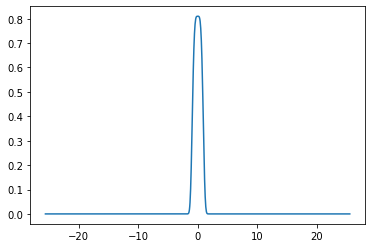

In [39]:
# plot the initial condition
plt.plot(xvec, psimat[0,:])
plt.show()

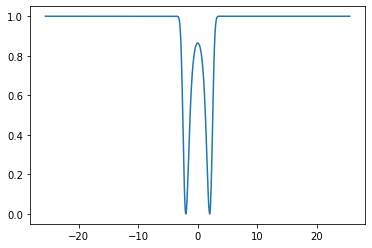

In [40]:
# define potential

# try a double well
def pot(x):
    return 1 - np.exp(-(x**2 - 4)**2/8)

# try a box
# def pot(x):
#     out = 1e3*np.ones(x.shape)*(np.abs(x) > 1) + np.zeros(x.shape)*(np.abs(x) <= 1)
#     return out

plt.plot(xvec, pot(xvec))
plt.show()

In [41]:
# implement "right-hand side" of the schrodinger equation,
# discretized in space but not in time

# vector to differentiate in Fourier space
kvec = np.fft.ifftshift( (2*np.pi*1j/(nx*dx))*np.arange(-nx//2, nx//2) )

potx = pot(xvec)

def schro(t, psi):
    psihat = np.fft.fft(psi)
    psixxhat = (kvec**2) * psihat
    psixx = np.fft.ifft(psixxhat)
    rhs = (-0.5*psixx + potx*psi)/1j
    return rhs

# solve using scipy
test = si.solve_ivp(schro, y0=psimat[0,:], t_eval = tvec, t_span=np.array([0, tvec[-1]]), rtol=1e-10, atol=1e-10)

# save solution into psimat
psimat[1:,:] = test.y.T[1:,:]

In [42]:
import time
from IPython.display import clear_output

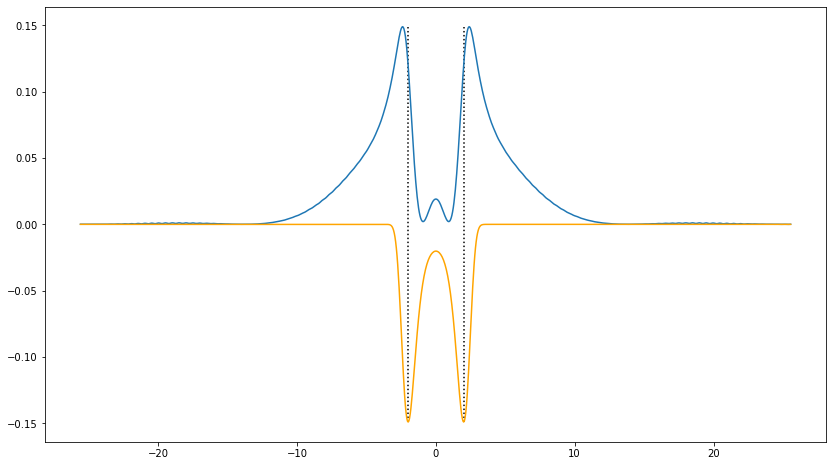

In [43]:
# plot in orange: potential with vertical dotted lines at plus/minus 2 (minima of wells)
# plot in blue: amplitude**2 of wavefunction
for i in range(0, 400):
    clear_output(wait=True)
    fig,ax = plt.subplots(figsize=(14,8))
    plt.plot(xvec, np.abs(psimat[i,:])**2)
    scale = np.max(np.abs(psimat[i,:])**2)
    plt.plot(xvec,(potx/np.max(potx)*scale - scale),color='orange')
    plt.vlines(2,-scale,scale,linestyles='dotted')
    plt.vlines(-2,-scale,scale,linestyles='dotted')
    plt.show()

In [45]:
print(np.sum(np.abs(psimat[i,:])**2)*dx)

0.9999999999991545
